In [1]:
filename = '抽卡记录.csv'

def contains_chinese(s):
    for c in s:
        if '\u4e00' <= c <= '\u9fa5':
            return True
    return False

def parse_file(filename):
    index = {
        '水月': [],
        '水陈': [],
        '其他': []
    }
    summed_lines = []
    with open(filename, encoding='utf-8') as f:
        for lineno, line in enumerate(f.readlines()):
            parts = line.split(',')
            accumulated = 0
            for part in parts:
                if part.isnumeric():
                    accumulated += int(part)
                elif part == '水月':
                    index['水月'].append((lineno, accumulated))
                elif part == '水陈':
                    index['水陈'].append((lineno, accumulated))
                elif contains_chinese(part):
                    index['其他'].append((lineno, accumulated))
            summed_lines.append(accumulated)
    return index, summed_lines

index, summed_lines = parse_file(filename)

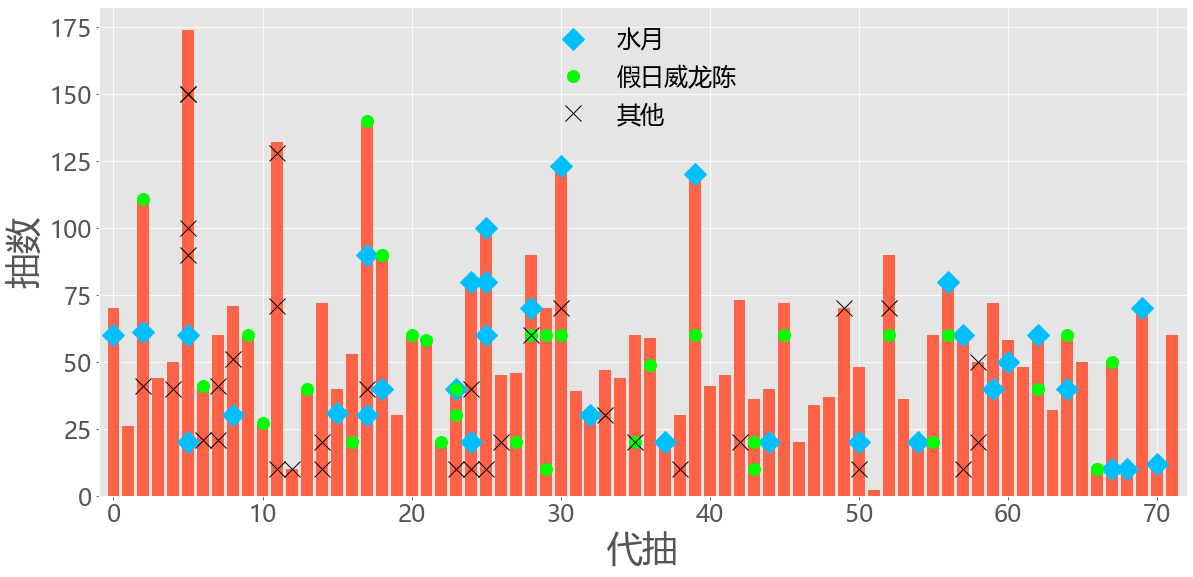

In [124]:
import matplotlib
import matplotlib.pyplot as plt
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
mpl.rcParams['axes.unicode_minus']

x = [i for i in range(len(summed_lines))]
y = summed_lines

fig, ax = plt.subplots(figsize=(19.5, 9))
ax.bar(x, y, color='tomato')
ax.set_xlim(-1, 72)
ax.tick_params(axis='both', which='major', labelsize=24)

def plot_6start(label, series, marker, markersize, color):
    a = [x for x, y in series]
    b = [y for x, y in series]
    ax.plot(a, b, label=label, linewidth=0, marker=marker, markersize=markersize, color=color)
plot_6start('水月', index['水月'], 'D', 16, 'deepskyblue')
plot_6start('假日威龙陈', index['水陈'], 'o', 12, 'lime')
plot_6start('其他', index['其他'], 'x', 16, 'black')

plt.legend(loc='upper center', fontsize=24, columnspacing=0.4, frameon=False, edgecolor='black', facecolor='white')
    
plt.xlabel("代抽", fontsize=36)
plt.ylabel("抽数", fontsize=36)
# plt.title("Energy output from various fuel sources")

# plt.xticks(x_pos, x)

plt.show()

fig.savefig('temp.png', transparent=True)

In [125]:
filename = '抽卡记录.csv'

def analyze_file_1(filename):
    either = 0
    both = 0
    with open(filename, encoding='utf-8') as f:
        for line in f.readlines():
            if line.find('水月') > 0 or line.find('水陈') > 0:
                either = either + 1
            if line.find('水月') > 0 and line.find('水陈') > 0:
                both = both + 1
    return either, both

either, both = analyze_file_1(filename)
print (either, both)

45 11


In [7]:
filename = '抽卡记录.csv'

def contains_chinese(s):
    for c in s:
        if '\u4e00' <= c <= '\u9fa5':
            return True
    return False

def analyze_file_2(filename):
    double = 0
    single = 0
    with open(filename, encoding='utf-8') as f:
        for lineno, line in enumerate(f.readlines()):
            parts = line.split(',')
            for i in range(len(parts)):
                if i + 1 < len(parts):
                    if parts[i].isnumeric() and int(parts[i]) < 10 and contains_chinese(parts[i + 1]):
                        single = single + 1
                        print ('Single', lineno + 1, i, parts[i + 1])
                if i + 2 < len(parts):
                    if parts[i].isnumeric() and int(parts[i]) == 10 and contains_chinese(parts[i + 1]) and contains_chinese(parts[i + 2]):
                        double = double + 1
                        print ('Double', lineno + 1, i, parts[i + 1], parts[i + 2])
    return double, single

double, single = analyze_file_2(filename)
print (double, single)

Double 6 18 银灰 嵯峨
Single 16 3 水月
Double 19 9 水陈 水陈
Single 22 12 水陈
Double 24 5 水陈 水月
Double 29 5 早露 水陈
Single 31 43 水月
Double 36 1 银灰 水陈
Double 67 0 水陈 水陈
6 3
